In [1]:
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
btc_ticker = yf.Ticker("BTC-USD")
csv_file = "btc.csv"

if os.path.exists(csv_file):
    os.remove(csv_file)
btc = btc_ticker.history(period="max")
btc.to_csv(csv_file)

btc = pd.read_csv(csv_file, index_col=0)
btc


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,66006.742188,66402.187500,65871.773438,66191.000000,14121265576,0.0,0.0
2024-06-16 00:00:00+00:00,66189.359375,66894.843750,66018.250000,66639.046875,13281140541,0.0,0.0
2024-06-17 00:00:00+00:00,66636.515625,67188.320312,65094.964844,66490.296875,30006354476,0.0,0.0


In [3]:
btc.index = pd.to_datetime(btc.index)
del btc["Dividends"]
del btc["Stock Splits"]


<Axes: xlabel='Date'>

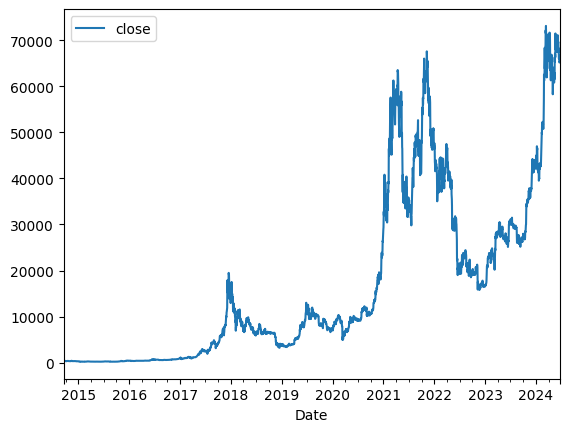

In [4]:
btc.columns = [c.lower() for c in btc.columns]
btc.plot.line(y="close", use_index=True)

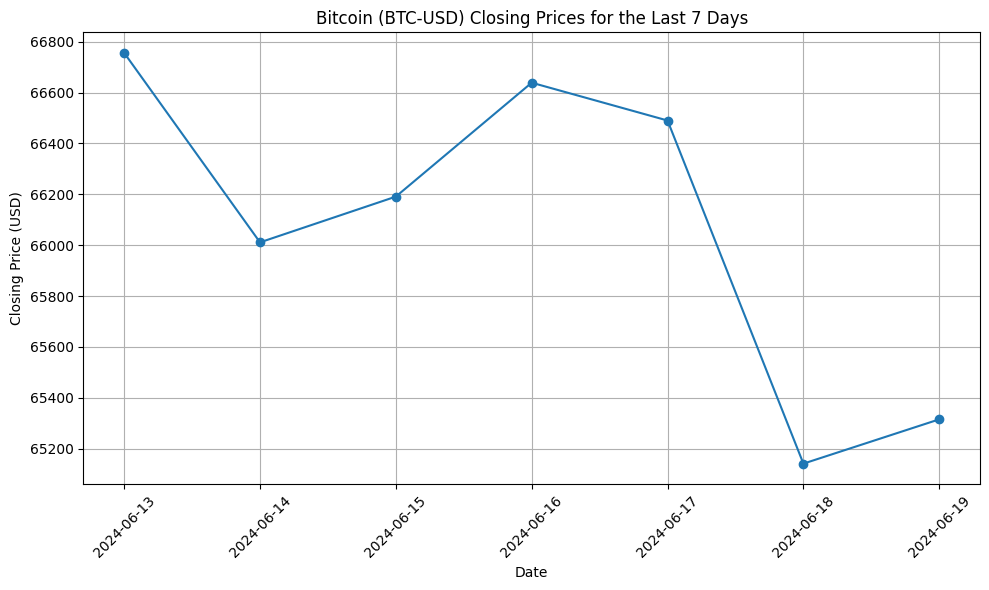

In [5]:
last_seven_days_btc = btc[-7:]

# Plot the closing price for the last seven days
plt.figure(figsize=(10, 6))
plt.plot(last_seven_days_btc.index, last_seven_days_btc['close'], marker='o')
plt.title('Bitcoin (BTC-USD) Closing Prices for the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
wiki = pd.read_csv("bitcoin_sentiment.csv", index_col=0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-06-15,0.533333,-0.055453,0.110185
2024-06-16,0.533333,-0.055453,0.110185
2024-06-17,0.566667,-0.024052,0.110185
2024-06-18,0.566667,-0.024052,0.110185


In [7]:
# Assuming 'btc' dataframe has a timezone-aware datetime index
# Localize timezone for 'wiki' dataframe if it's tz-naive
if wiki.index.tz is None:
    wiki.index = wiki.index.tz_localize('UTC')

# Merge the dataframes
btc = btc.merge(wiki, left_index=True, right_index=True)

# Continue with the rest of your code
btc["tomorrow"] = btc["close"].shift(-1)
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)
btc["target"].value_counts()


target
1    1887
0    1677
Name: count, dtype: int64

In [8]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232759,0.532718,394.795990,0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,66006.742188,66402.187500,65871.773438,66191.000000,14121265576,0.533333,-0.055453,0.110185,66639.046875,1
2024-06-16 00:00:00+00:00,66189.359375,66894.843750,66018.250000,66639.046875,13281140541,0.533333,-0.055453,0.110185,66490.296875,0
2024-06-17 00:00:00+00:00,66636.515625,67188.320312,65094.964844,66490.296875,30006354476,0.566667,-0.024052,0.110185,65140.746094,0
2024-06-18 00:00:00+00:00,66490.976562,66556.703125,64066.957031,65140.746094,39481285950,0.566667,-0.024052,0.110185,65314.914062,1


In [9]:
btc.to_csv('btcSentiment.csv')